In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
from os import listdir
%matplotlib inline

In [38]:
def get_img_name(row):
    n = filenames.loc[filenames.ImageNumber==row['ImageNumber'], 'FileName_original'].tolist()
    if not n:
        return(np.nan)
    else:
        return(n[0])

In [42]:
output_class = "wt"
data_file = "C:/Users/sarah/Desktop/ODonnell/CellProfiler/Results on Resized Images/" + output_class + "/Spreadsheets/SpotAsssayQuant_NaturalSpots.csv"
filenames_file = "C:/Users/sarah\Desktop/ODonnell/CellProfiler/Results on Resized Images/" + output_class + "/Spreadsheets/SpotAsssayQuant_Image.csv"


df = pd.read_csv(data_file)
filenames = pd.read_csv(filenames_file)
df.drop(columns=['Number_Object_Number'], inplace = True)
df = df.rename(columns = {'AreaShape_Area': 'Area','ObjectNumber':'Row'})


In [43]:
data=df.groupby([df.ImageNumber,pd.cut(df.Row, [1,4,8,12,16,20,24,28], include_lowest=True, labels = ['Row1','Row2','Row3','Row4','Row5','Row6','Row7'])])['Area'].sum().rename("binArea").reset_index()
data['ImageName'] = data.apply(get_img_name, axis =1)
data = data[['ImageNumber', 'ImageName', 'Row', 'binArea']]
data = data.dropna()
data_pivot = data.pivot(index = "ImageName", columns = 'Row', values = 'binArea')


data_pivot

Row,Row1,Row2,Row3,Row4,Row5,Row6,Row7
ImageName,,,,,,,
WT 2-14-18 control crop.tif,11384.0,10226.0,10264.0,9992.0,10381.0,10505.0,11200.0
WT 2-14-18 min crop.tif,9949.0,9474.0,9380.0,9189.0,10014.0,10094.0,10032.0
WT 426 Series 37C 7-6-18 contorl crop.tif,12021.0,9183.0,9369.0,9849.0,9682.0,10741.0,14698.0
WT ura crop 6-4-18.tif,15939.0,13359.0,13462.0,13805.0,13429.0,13918.0,17529.0
wt 426 phospho rapa50 day5 7-15-18 control crop.tif,12408.0,10316.0,10410.0,10271.0,11234.0,11704.0,15784.0
wt 0 crop 4-9-18.tif,13342.0,12663.0,11014.0,11147.0,10934.0,11783.0,12721.0
wt azc crop 4-23-18.tif,7412.0,5798.0,5966.0,6234.0,3192.0,5538.0,6135.0
wt control crop 4-2-18.tif,10365.0,10236.0,10490.0,9112.0,9778.0,9959.0,10949.0
wt day5 5-28-18 Ura- crop.tif,14952.0,11522.0,12132.0,11877.0,11914.0,12620.0,15069.0


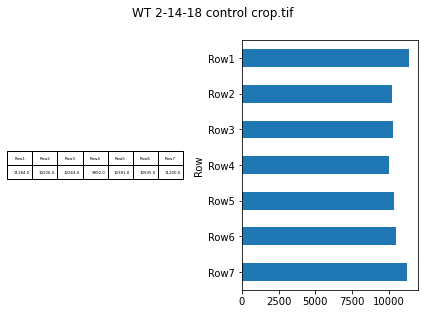

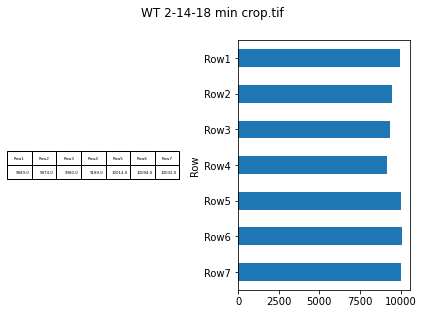

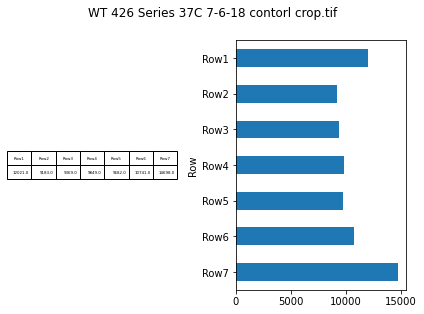

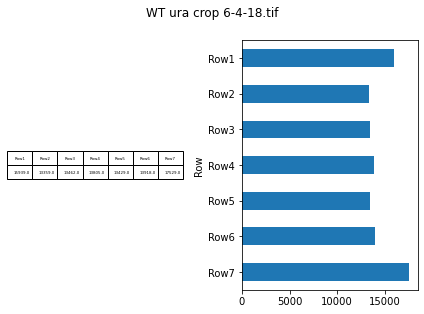

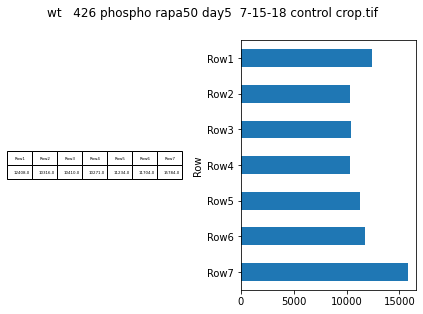

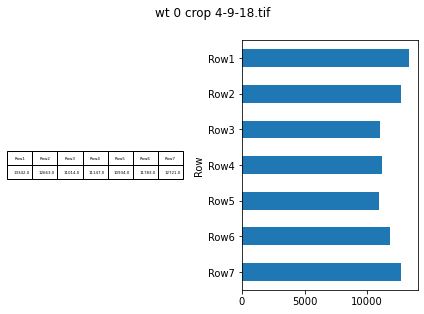

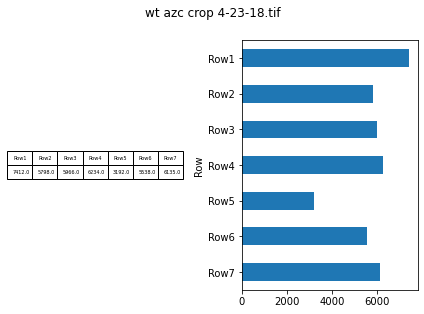

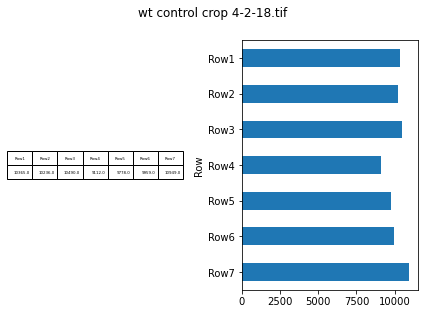

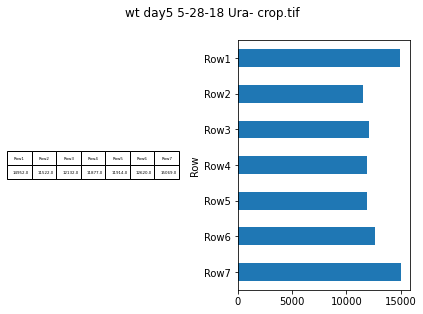

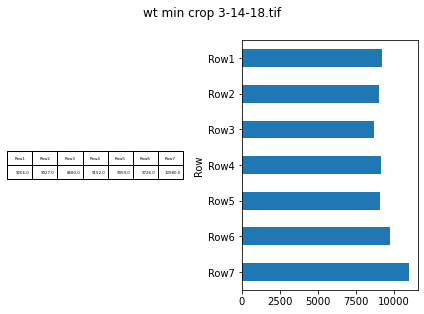

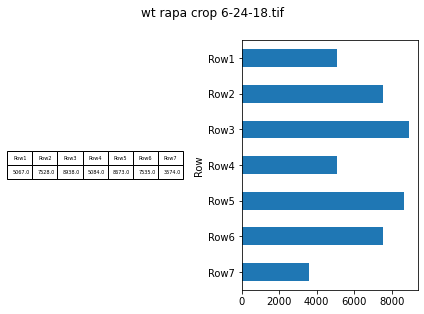

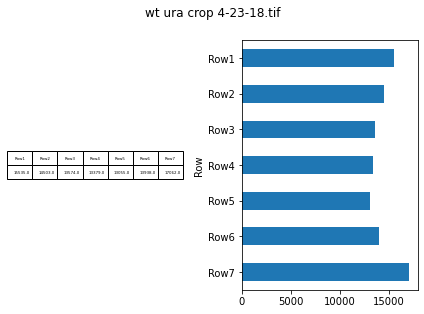

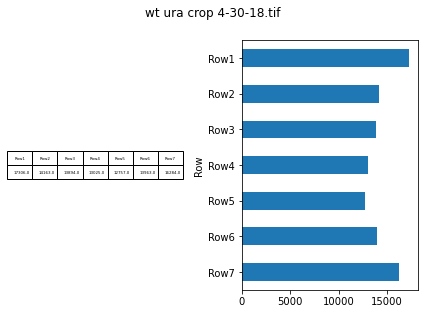

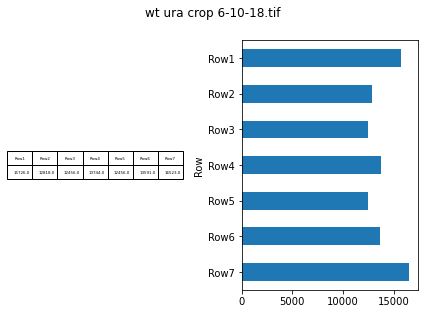

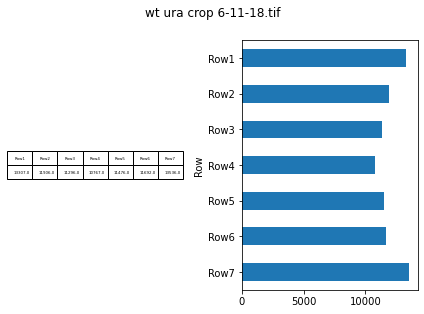

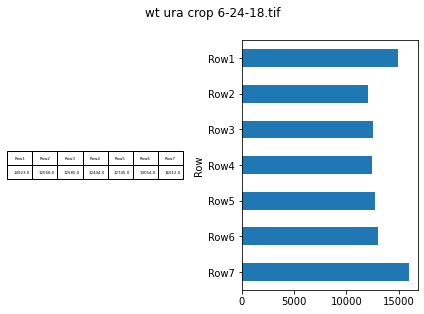

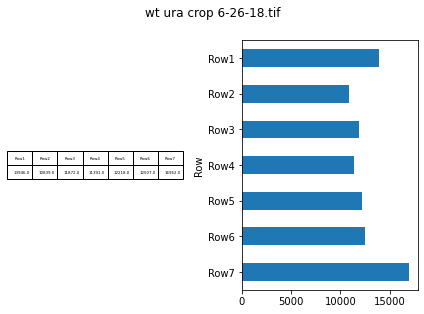

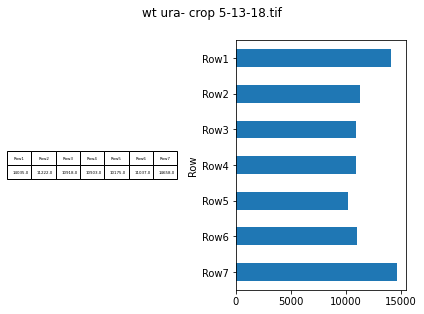

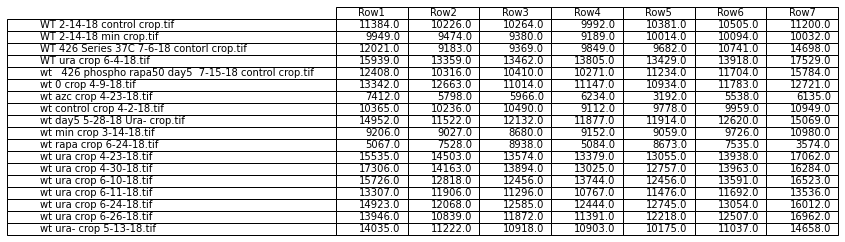

In [45]:
with PdfPages("C:/Users/sarah/Desktop/ODonnell/CellProfiler/Results on Resized Images/" + output_class + "/Graphs/Result_graphs.pdf") as pdf:
    for img in filenames['FileName_original']:
        fig, ax = plt.subplots(1,2)
        fig.suptitle(img, y = 1.08)
        fig.patch.set_visible(False)
        piv = data_pivot.loc[[img]]

        ax[0].axis('off')
        ax[0].axis('tight')
        ax[0].table(cellText=piv.values, colLabels=piv.columns, loc='center')

        plot = data[data['ImageName']==img].plot(ax = ax[1], kind='barh', x = 'Row', y = 'binArea')
        plt.gca().invert_yaxis() 
        ax[1].get_legend().remove()

        fig.tight_layout()
        plt.show()
        pdf.savefig(fig,bbox_inches='tight')
        
with PdfPages("C:/Users/sarah/Desktop/ODonnell/CellProfiler/Results on Resized Images/" + output_class + "/Graphs/Result_table.pdf") as pdf:
    fig = plt.figure(figsize=(9,2))
    ax = plt.subplot(111)
    ax.axis('off')
    ax.axis('tight')
    #fig.suptitle(output_class + ' Areas', y = 1.08)
    ax.table(cellText=data_pivot.values, colLabels=data_pivot.columns,  rowLabels=data_pivot.index,  loc='center')
    #fig.tight_layout()

    pdf.savefig(fig,bbox_inches='tight')

,ImageNumber,Row,binArea
0,1,Row1,10917.0
1,1,Row2,13057.0
2,1,Row3,18406.0
3,1,Row4,15847.0
4,1,Row5,17826.0
...,...,...,...
464,67,Row3,9671.0
465,67,Row4,10507.0
466,67,Row5,10726.0
467,67,Row6,11587.0
